In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding="latin1")

## Analysis in temperature change

In [2]:
df_temp = df[df["Element"] == "Temperature change"].drop(columns=["Element Code", "Element", "Unit"])
df_temp_melted = df_temp.melt(id_vars=["Area Code", "Area", "Months Code", "Months"], 
                               var_name="Year", value_name="Temperature Change") #In original data, each year is a separate column, I convert into long format so that it's easier to analyze the trend
df_temp_melted["Year"] = df_temp_melted["Year"].str[1:].astype(int)#In original data, variable 'year' is in string format, we delay the 'Y' in fornt of the year and turn it into int
df_temp_melted = df_temp_melted[df_temp_melted["Months"].isin(["January", "Febuary", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])]#In the original data,there are temperature change in the unit of quarter,I removed them
global_avg = df_temp_melted.groupby("Year")["Temperature Change"].mean()  # We calculate the average global temperature change each year


### Draw the global temperature change trend from 1961-2019

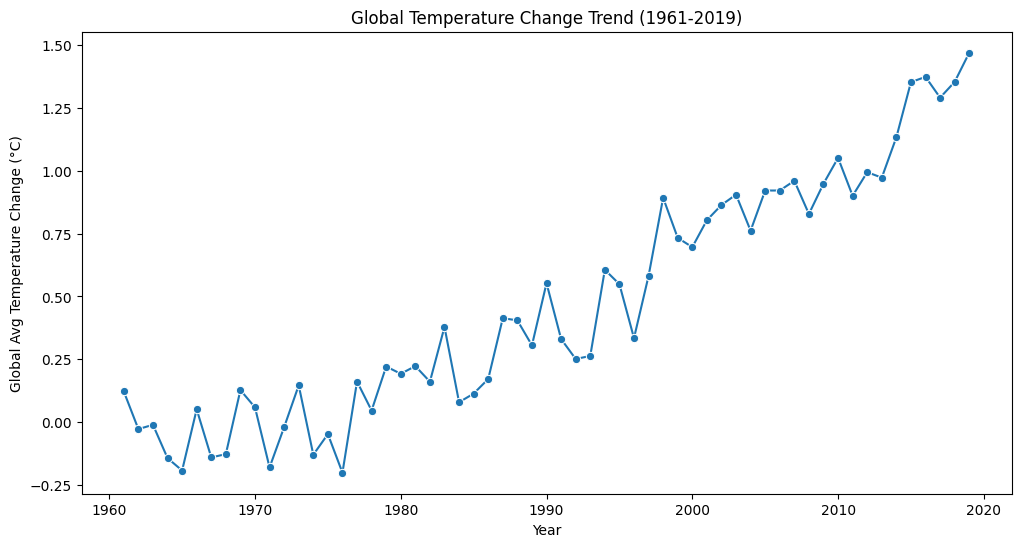

In [3]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=global_avg.index, y=global_avg.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Global Avg Temperature Change (°C)")
plt.title("Global Temperature Change Trend (1961-2019)")
plt.show()

### Find the top 5 and last 5 due to the average temperature change

In [4]:
df_temp_melted.groupby("Area")["Temperature Change"].mean().sort_values(ascending=False)

Area
Serbia                         1.528909
Luxembourg                     1.516523
Montenegro                     1.515084
Slovenia                       1.461484
Belgium                        1.437959
                                 ...   
Yugoslav SFR                   0.021891
Falkland Islands (Malvinas)    0.019953
Midway Island                  0.002451
Pitcairn Islands              -0.013252
Nauru                         -0.113077
Name: Temperature Change, Length: 284, dtype: float64

### Draw the temperature change for each month

C:\Users\23519\AppData\Local\Temp\ipykernel_30576\778647934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_change.index, y=seasonal_change.values,palette="coolwarm")


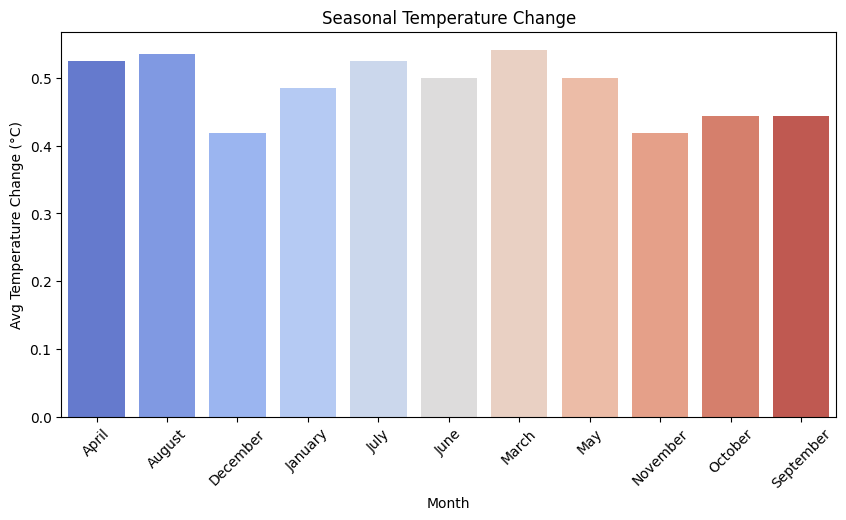

In [5]:
seasonal_change = df_temp_melted.groupby("Months")["Temperature Change"].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=seasonal_change.index, y=seasonal_change.values,palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Avg Temperature Change (°C)")
plt.title("Seasonal Temperature Change")
plt.show()


## Analysis in the standard deviation of temperature

C:\Users\23519\AppData\Local\Temp\ipykernel_30576\3612302197.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_std.index, y=seasonal_std.values, palette="coolwarm")


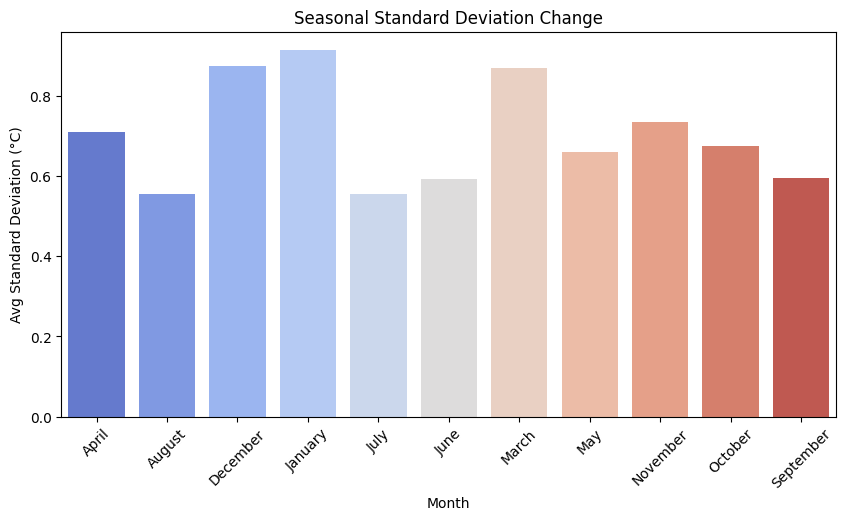

In [6]:
df_std = df[df["Element"] == "Standard Deviation"].drop(columns=["Element Code", "Element", "Unit"])
df_std_melted = df_std.melt(id_vars=["Area Code", "Area", "Months Code", "Months"], 
                             var_name="Year", value_name="Standard Deviation")
df_std_melted["Year"] = df_std_melted["Year"].str[1:].astype(int)
df_std_melted = df_std_melted[df_std_melted["Months"].isin(["January", "Febuary", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])]
seasonal_std = df_std_melted.groupby("Months")["Standard Deviation"].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=seasonal_std.index, y=seasonal_std.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Avg Standard Deviation (°C)")
plt.title("Seasonal Standard Deviation Change")
plt.show()
